# Aula 04 - Resolução dos Exercícios

## Novas perguntas do CEO

1. Crie uma nova coluna chamada "dormitory_type"
    - Se o valor da coluna "bedrooms" for igual a 1 => "Studio"
    - Se o valor da coluna "bedrooms" for igual a 2 => "Apartment"
    - Se o valor da coluna "bedrooms" for igual a 3 => "House" 
<br>


2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos
3. Faça um gráfico de linhas que represente a média dos preços pelo número de quartos
4. Faça um gráfico de barras que represente a mediana dos preços pelo número de quartos
5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, à partir do ano de 1930
6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis
7. Crie um dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 linha e 2 colunas)
8. Crie um dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)
9. Crie um dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)
10. Crie um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

### 0. Loading Data

In [2]:
# Carregando das bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
from IPython.core.display import HTML

In [3]:
def jupyter_settings():
    pd.set_option('display.float_format', lambda x: '%.2f ' % x)
    %matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container{width: 100%: important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Lendo o arquivo pelo read_csv
df = pd.read_csv('kc_house_data.csv', low_memory=False, delimiter=',', quotechar='"')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1. Crie uma nova coluna chamada "dormitory_type"
    - Se o valor da coluna "bedrooms" for igual a 1 => "Studio"
    - Se o valor da coluna "bedrooms" for igual a 2 => "Apartment"
    - Se o valor da coluna "bedrooms" for igual a 3 => "House" 

In [5]:
def dormitory_type(x):
    if x == 1:
        return "studio"
    elif x == 2:
        return "apartment"
    elif x > 2:
        return "house"
    else:
        return "NA"

In [6]:
df['dormitory_type'] = df['bedrooms'].apply(dormitory_type)

### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

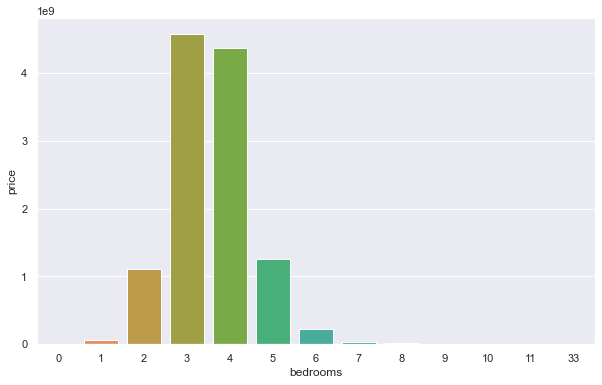

In [17]:
by_bed = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=by_bed);

### 3. Faça um gráfico de linhas que represente a média dos preços pelo número de quartos

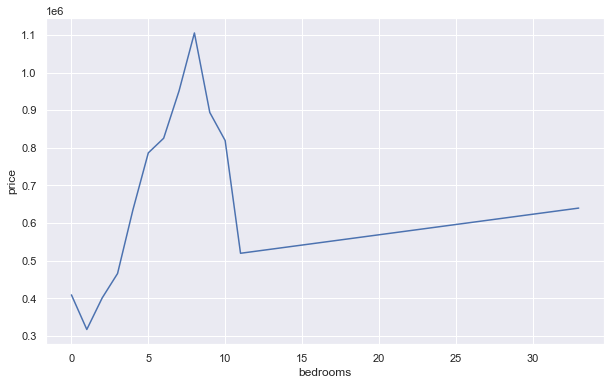

In [16]:
by_bed_mean = df[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
by_bed_mean
sns.lineplot( x='bedrooms', y='price', data=by_bed_mean );

### 3.1 Faça um gráfico de linhas que represente a média dos preços pelo ano de construção

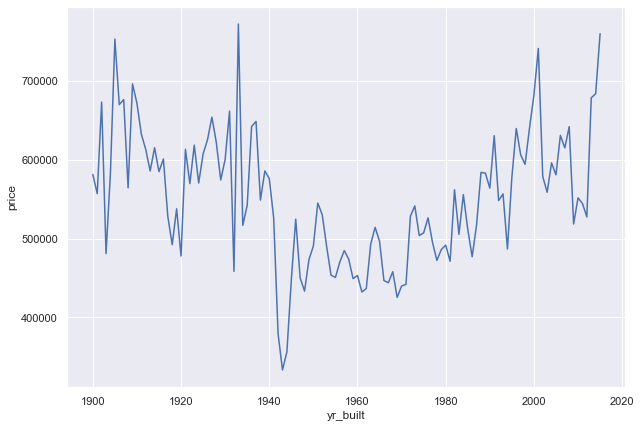

In [9]:
by_yr_built = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
by_yr_built

plt.figure(figsize=(10, 7))
sns.lineplot( x='yr_built', y='price', data=by_yr_built );

### 4. Faça um gráfico de barras que represente a mediana dos preços pelo tipo dos dormitórios

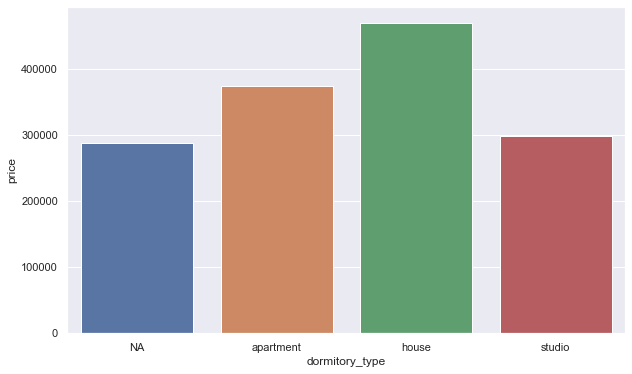

In [15]:
data = df[['price', 'dormitory_type']].groupby( 'dormitory_type' ).median().reset_index()
sns.barplot( x='dormitory_type', y='price', data=data );

### 4.1 Faça um gráfico de barras que represente a media dos preços pelo número de quartos

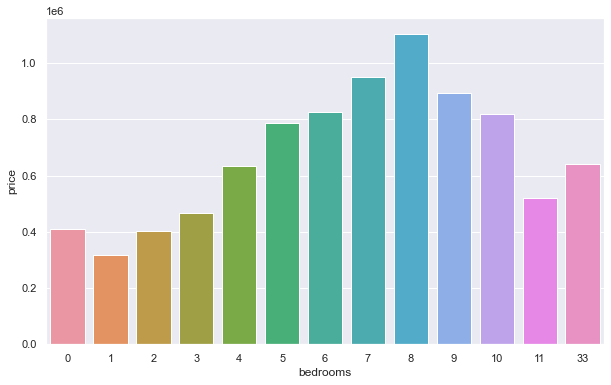

In [11]:
data = df[['price', 'bedrooms']].groupby( 'bedrooms' ).mean().reset_index()
sns.barplot( x='bedrooms', y='price', data=data );

### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, à partir do ano de 1930

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

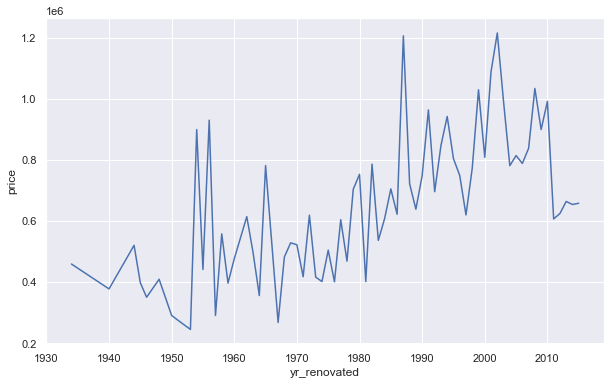

In [18]:
by_renovated = df.loc[df['yr_renovated'] >= 1930]
by_renovated = by_renovated[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x = by_renovated['yr_renovated'], y = by_renovated['price'] )

### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis

In [13]:
by_mean_price = df[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()
by_mean_price.head()

,yr_built,dormitory_type,price
0,1900,apartment,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartment,452856.40
4,1901,house,578619.17


### 7. Crie um dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 linha e 2 colunas)

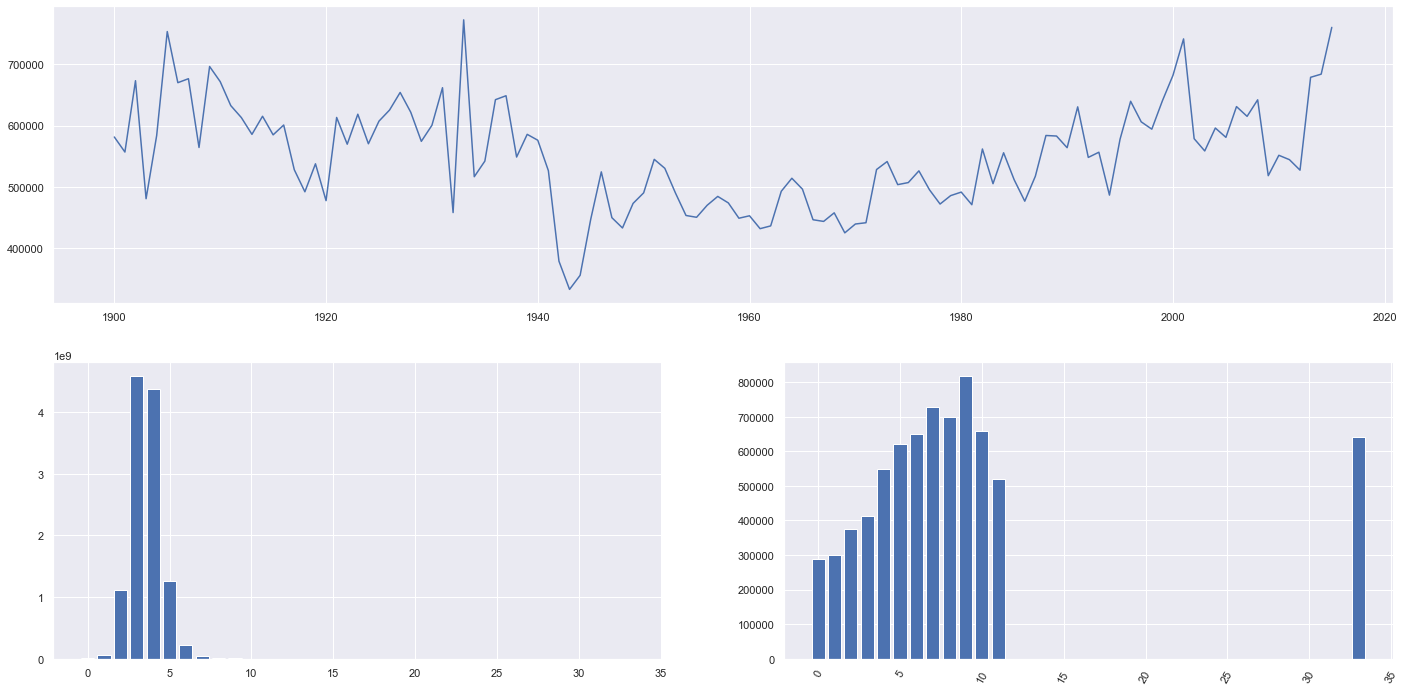

In [23]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) # Fist row
ax2 = fig.add_subplot(specs[1, 0]) # Second row - First Column
ax3 = fig.add_subplot(specs[1, 1])# Second row - Second Column

#  Questão 3
by_bed = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar( by_bed['bedrooms'], by_bed['price']);


# Questão 2
by_bed_mean = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot( by_bed_mean['yr_built'], by_bed_mean['price'] );


# Questão 4
data = df[['price', 'bedrooms']].groupby( 'bedrooms' ).median().reset_index()
ax3.bar( data['bedrooms'], data['price'] );
plt.xticks(rotation=60);

### 8. Crie um dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)

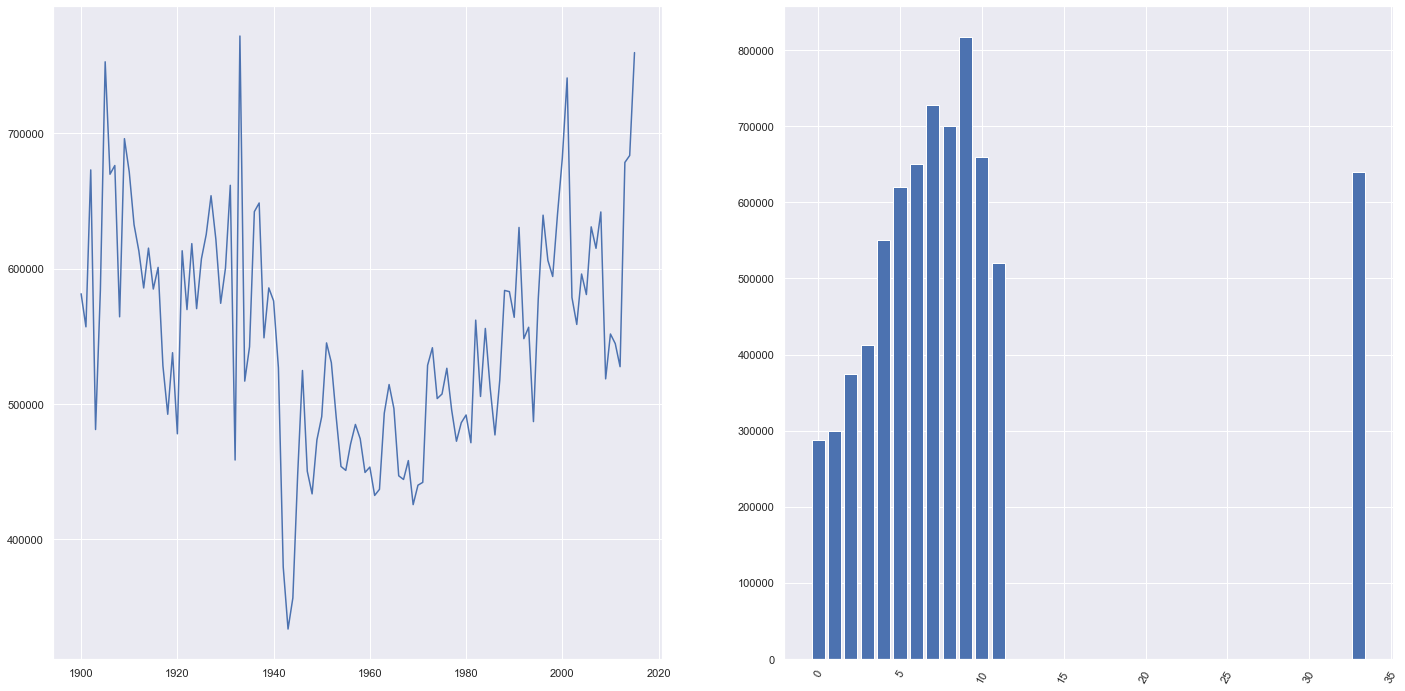

In [24]:
fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) # Fist row
ax2 = fig.add_subplot(specs[0, 1]) # Second row - First Column

# Questão 2
by_bed_mean = df[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot( by_bed_mean['yr_built'], by_bed_mean['price'] );


# Questão 4
data = df[['price', 'bedrooms']].groupby( 'bedrooms' ).median().reset_index()
ax2.bar( data['bedrooms'], data['price'] );
plt.xticks(rotation=60);

### 9. Crie um dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)

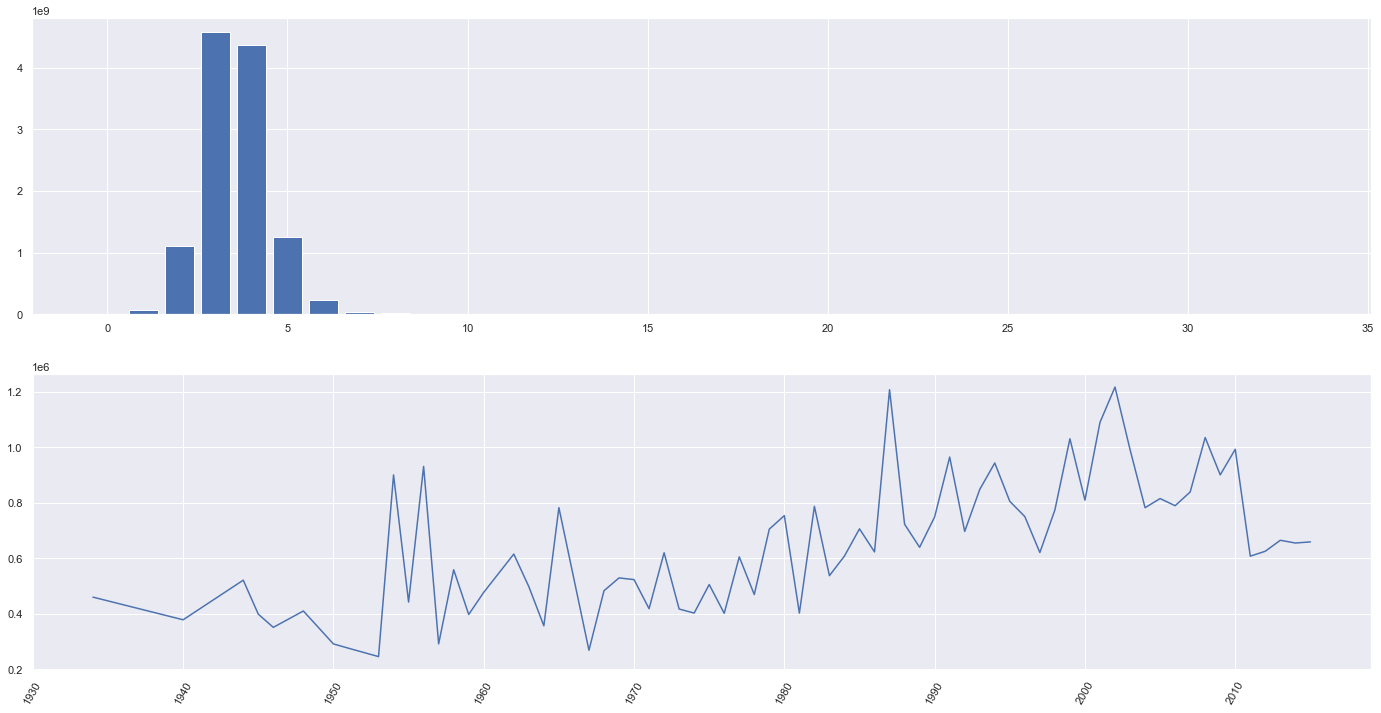

In [26]:
fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) # Fist row
ax2 = fig.add_subplot(specs[1, 0]) # Second row - First Column

#  Questão 3
by_bed = df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar( by_bed['bedrooms'], by_bed['price']);


# Questão 5
by_renovated = df.loc[df['yr_renovated'] >= 1930]
by_renovated = by_renovated[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot( by_renovated['yr_renovated'], by_renovated['price'] );
plt.xticks(rotation=60);

### 10. Crie um gráfico de mapa com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [29]:
# Modificar o mapa da entrega da aula anterior fazendo com o que os pontos
# tenham o tamanho dependente do preço
houses = df[['id', 'lat', 'long', 'price', 'sqft_living']]
# houses['sqrt_m'] = round(houses['sqft_living'] * 0.092903, 2)
fig = px.scatter_mapbox(houses, lat='lat', lon='long', size='sqft_living', color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=15, zoom=10)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()